In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
# Loading the Transactions and Customer Demographics Datasets

trans = pd.read_csv('Transactions_Cleaned.csv')
cust = pd.read_csv('CustomerDemographic_Cleaned.csv')

In [3]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,3.833294e+03
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,8.134145e+05
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,4.462413e+05
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,4.567331e+05
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1.252445e+06


In [4]:
print("Total records (rows) in the Transaction Dataset : {}".format(trans.shape[0]))
print("Total features (columns) in the Transaction Dataset : {}".format(trans.shape[1]))

Total records (rows) in the Transaction Dataset : 19803
Total features (columns) in the Transaction Dataset : 14


In [5]:
cust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,70
3,4,Talbot,None,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,62
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,47


In [6]:
print("Total records (rows) in the Customer Demographics Dataset : {}".format(cust.shape[0]))
print("Total features (columns) in the Customer Demographics Dataset : {}".format(cust.shape[1]))

Total records (rows) in the Customer Demographics Dataset : 3912
Total features (columns) in the Customer Demographics Dataset : 13


In [7]:
merged_trans_cust = pd.merge(trans, cust, left_on='customer_id', right_on='customer_id', how='inner')

In [8]:
merged_trans_cust.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,45
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,45


In [9]:
print("Total records (rows) in the Merged dataset : {}".format(merged_trans_cust.shape[0]))
print("Total features (columns) in the Merged dataset : {}".format(merged_trans_cust.shape[1]))

Total records (rows) in the Merged dataset : 19354
Total features (columns) in the Merged dataset : 26


In [10]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

**The data-type of transaction_date column is not in date-time format. Hence the data-type of the column should be changed from object to datetime type.**

In [11]:
merged_trans_cust['transaction_date']=pd.to_datetime(merged_trans_cust['transaction_date'])

# 1. RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is used to identify and segment a company's best customers by examining their purchasing behavior. It evaluates three key factors: how recently a customer made a purchase (Recency), how often they make purchases (Frequency), and how much money they spend (Monetary). By scoring customers based on these criteria, businesses can classify customers into segments, such as high-value and at-risk customers

Recency (R): Who have purchased recently? Number of days since last purchase (least recency)

Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)

Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

In [12]:
# max transaction date or latest transaction date

max_trans_date = max(merged_trans_cust['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [13]:
# taking last transaction date as a  reference date for comparision and
# finding number of days between a transaction date and last transaction date to compute the recency

comparision_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")

In [14]:
# creating a RFM table that will contain all values recency, frequency and monetary data.

rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparision_date - date.max()).days,
                                                           'product_id': lambda prod_id : len(prod_id),
                                                           'Profit': lambda p : sum(p)})

In [15]:
# the columns in rfm_table dataframe are not properly named. Renaming of the columns to appropriate name is needed.

rfm_table.columns

Index(['transaction_date', 'product_id', 'Profit'], dtype='object')

In [16]:
# renaming columns 

rfm_table.rename(columns={'transaction_date' : 'recency',
                         'product_id' : 'frequency',
                         'Profit' : 'monetary'}, inplace=True)

In [17]:
# dividing the recency, frequency, monetary into 4 quartile(min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

# r_quartile 1 is best as it shows the most recent purchase which is good
rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])

#f_quartile and m_quartile 4 is best as it shows higher value
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])

In [18]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,7.415227e+06,4,4,4
2,128,3,3.014520e+06,1,1,2
3,102,8,9.072278e+06,1,4,4
4,195,2,4.438085e+05,1,1,1
5,16,6,3.810360e+06,4,2,2
...,...,...,...,...,...,...
3496,256,4,3.591962e+06,1,1,2
3497,52,3,2.840735e+06,2,1,2
3498,127,6,2.659640e+06,1,2,2


In [19]:
# Calculation of RFM score.
# Max weightage is given to recency then frequency and then monetary.

rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)

In [20]:
# Assigning title to a customer.
# Platinum corresponds to Highest range of RFM score downto Bronze to lowest range of RFM score.

rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [21]:
rfm_table


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,7.415227e+06,4,4,4,444,Platinum
2,128,3,3.014520e+06,1,1,2,112,Bronze
3,102,8,9.072278e+06,1,4,4,144,Bronze
4,195,2,4.438085e+05,1,1,1,111,Bronze
5,16,6,3.810360e+06,4,2,2,422,Platinum
...,...,...,...,...,...,...,...,...
3496,256,4,3.591962e+06,1,1,2,112,Bronze
3497,52,3,2.840735e+06,2,1,2,212,Silver
3498,127,6,2.659640e+06,1,2,2,122,Bronze


# Merging both RFM table with Transaction and Customer Tables

RFM_table dataframe is merged with Transactions and Customer Demographics datasets, to gain insights of Customer Segments along with transactions. The dataframe are joined based on customer_ids from both datasets.

In [22]:
cust_trans_rfm = pd.merge(merged_trans_cust, rfm_table, left_on='customer_id', right_on='customer_id', how='inner')

In [23]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

**all datatypes looks fine**

## Creating an Age Group Feature

In [24]:
cust_trans_rfm['Age_Group'] = cust_trans_rfm['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

## Creating a Detail Customer title / tag based on RFM Score

An extended version of customer title is made which divides the entire number of customers into 11 groups. The groups are mainly Platinum Customers, Very Loyal, Becoming Loyal, Recent Customers, Potential Customers, Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.

The demarkation of customers into the above mentioned groups is based on their RFM scores.

In [25]:
# Function as a lookup to appropriate customer titles based on RFM score.

def cust_score_title_lkup(cols):
    rfm_score=cols[0]
    
    if rfm_score >=444:
        return 'Platinum Customer'
    elif rfm_score>=433 and rfm_score<444:
        return 'Very Loyal'
    elif rfm_score>=421 and rfm_score<433:
        return 'Becoming Loyal'
    elif rfm_score>=344 and rfm_score<421:
        return 'Recent Customer'
    elif rfm_score>=323 and rfm_score<344:
        return 'Potential Customer'
    elif rfm_score>=311 and rfm_score<323:
        return 'Late BLoomer'
    elif rfm_score>=224 and rfm_score<311:
        return 'Lossing Customer'
    elif rfm_score>=212 and rfm_score<224:
        return 'High Risk Customer'
    elif rfm_score>=124 and rfm_score<212:
        return 'Almost Lost Customer'
    elif rfm_score>=112 and rfm_score<124:
        return 'Evasive Customer'
    else:
        return 'Lost Customer'

In [26]:
# creating new feature detail_cust_title

cust_trans_rfm['detail_cust_title']=cust_trans_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

In [27]:
# Function to provide ranks to customer based on their title

def get_rank(cols):
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11
    

In [28]:
#creating new feature Rank
cust_trans_rfm['rank']=cust_trans_rfm[['detail_cust_title']].apply(get_rank, axis=1)

# 2. Exporting to csv file

After performing data quality assessment(DQA), data cleaning(DC) and RFM analysis on dataset, it's time to export the dataset to csv file for further **Exploratory Data Analysis (EDA)**.

In [29]:
cust_trans_rfm.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)

In [30]:
print('Total records in final dataset : {}'.format(cust_trans_rfm.shape[0]))

Total records in final dataset : 19354


# 3. Data Analysis and Exploration

## 3.1 New Customer vs Old Customer Age Distributions

In [31]:
new_cust = pd.read_csv('NewCustomerList_Cleaned.csv')

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


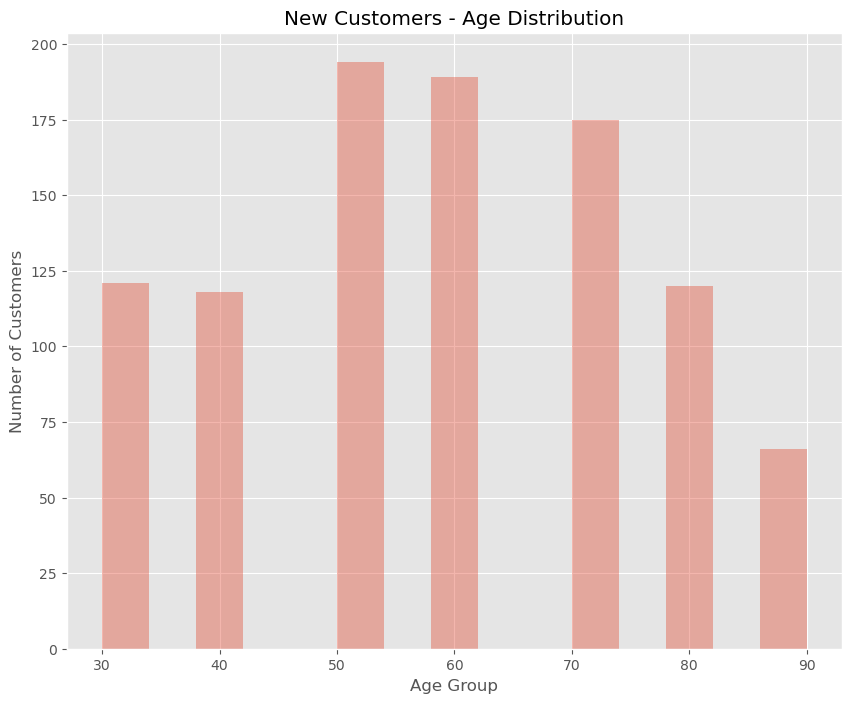

In [32]:
plt.figure(figsize=(10,8))
sns.distplot(new_cust['Age Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Age Distribution')

plt.show()

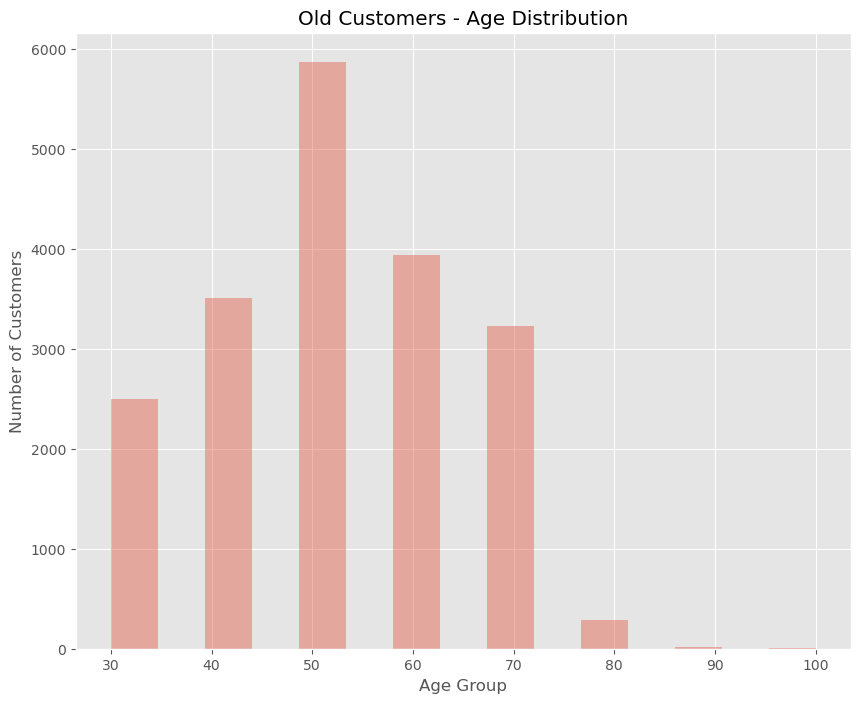

In [33]:
plt.figure(figsize=(10,8))
sns.distplot(cust_trans_rfm['Age_Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Age Distribution')

plt.show()

## 3.2 Bike related purchases over last 3 years by gender

In [34]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}).reset_index()

In [35]:
total_records = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()

In [36]:
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']
                                                        /total_records)*100

In [37]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,478488,50.503731
1,Male,468943,49.496269


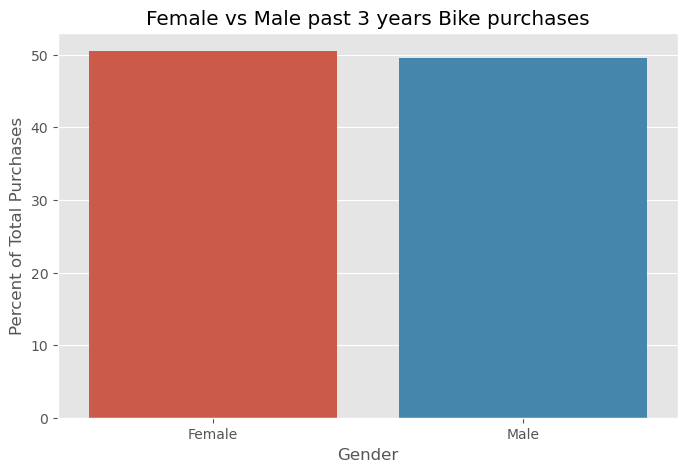

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender',y='Percent_of_total',data=cust_bike_purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male past 3 years Bike purchases')

plt.show()

## 3.3 Job Industry Customer Distribution

Among the **New Customers** the highest amount of sales comes from customers having a job in Manufacturing and Financial serivices sector. The smallest chunk of sales comes from customers in Agriculture and from Telecom Sector with 3% sales only. Similar trend is observed among **Old Customers**.

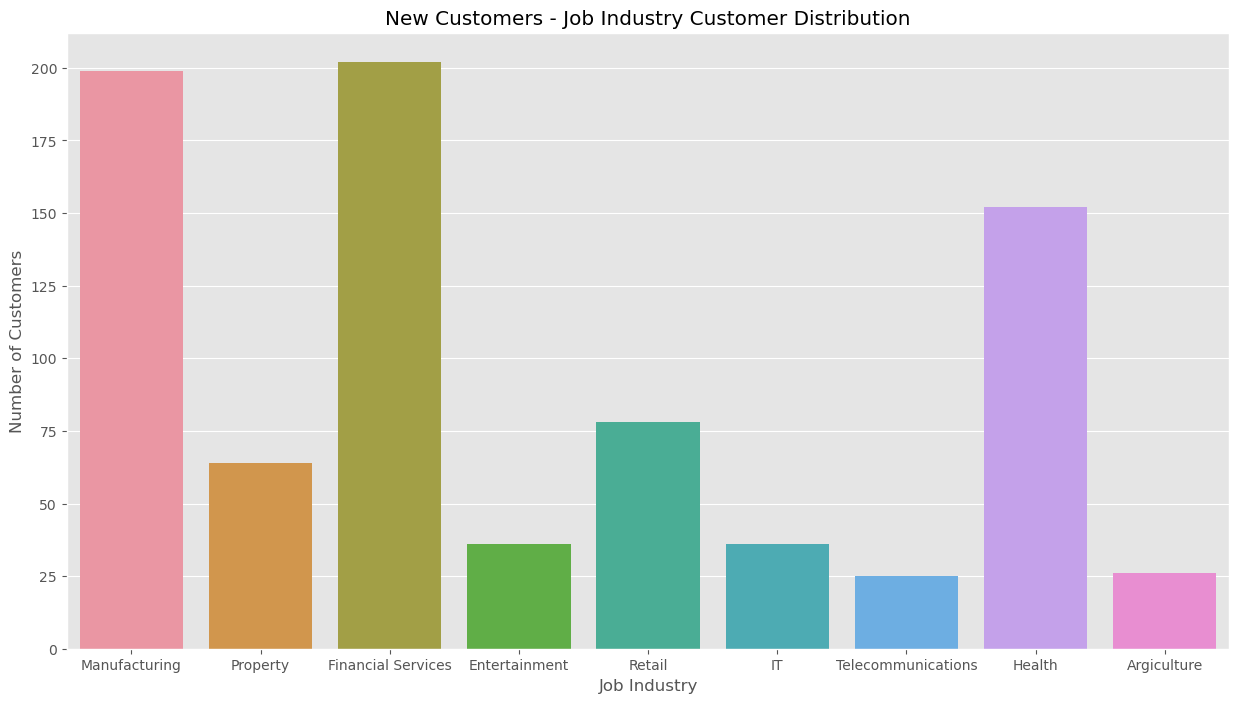

In [39]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=new_cust[~(new_cust['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('New Customers - Job Industry Customer Distribution')

plt.show()

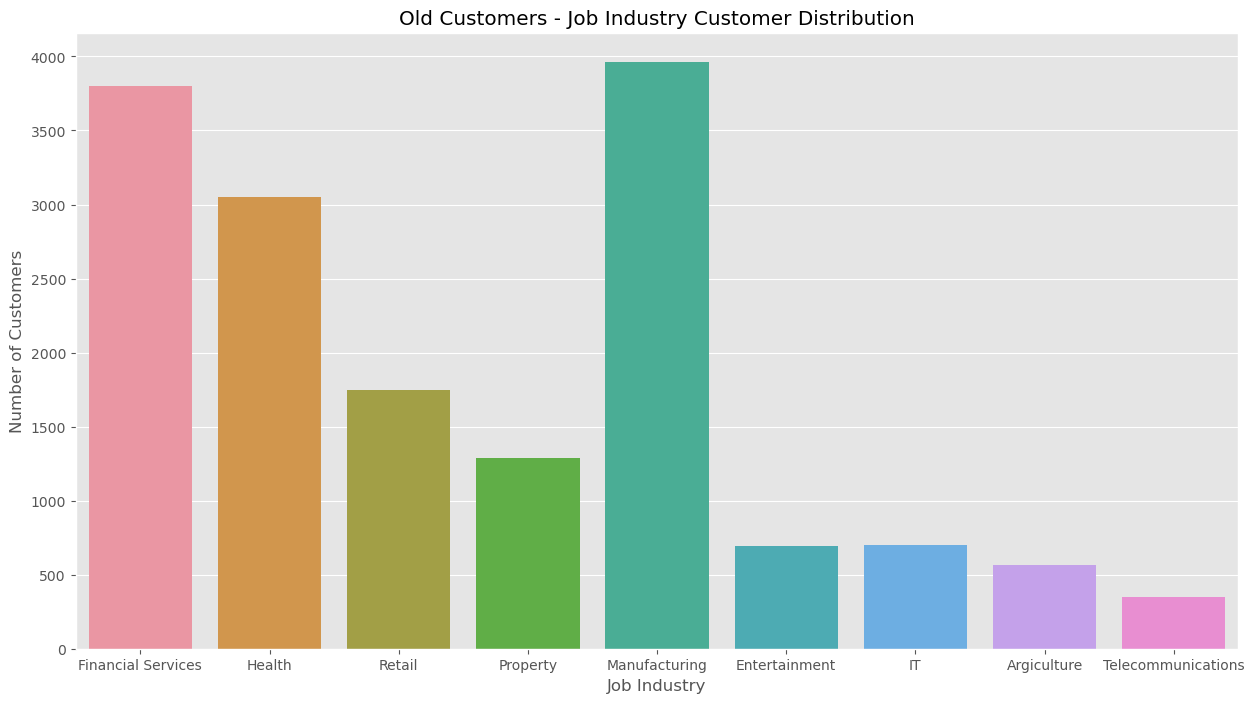

In [40]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')

plt.show()

## 3.4 Wealth Segmentation by Age Group

Across all Age groups the max number of customers are classified as 'Mass Customers'. The next being 'High Net Worth'. However among 40-49 aged customers 'Affluent Customers' outperforms the 'High Net Worth' customers.

**NEW CUSTOMERS**

In [41]:
wealth_age_seg_new = new_cust.groupby(['wealth_segment', 'Age Group']).size().reset_index()

In [42]:
wealth_age_seg_new.rename(columns={0:'Number of Customers'}, inplace=True)
wealth_age_seg_new

,wealth_segment,Age Group,Number of Customers
0,Affluent Customer,30,37
1,Affluent Customer,40,23
2,Affluent Customer,50,50
3,Affluent Customer,60,46
4,Affluent Customer,70,35
5,Affluent Customer,80,31
6,Affluent Customer,90,13
7,High Net Worth,30,26
8,High Net Worth,40,37
9,High Net Worth,50,50


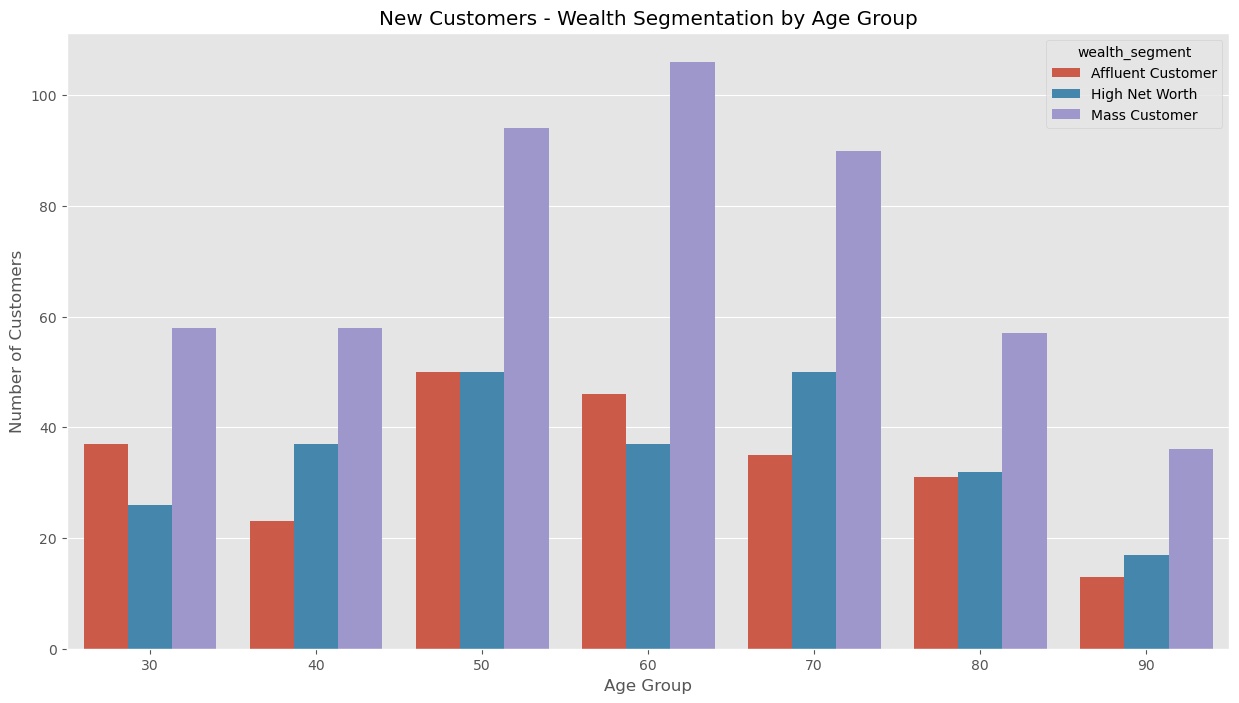

In [43]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')
plt.show()

In all the age groups the most number of customers are 'Mass Customers'. The 2nd largest customer base being the 'High Net Worth' group.
In the age group 50-59 the 'Affluent Customer' group outperforms 'High Net Worth' group

**OLD CUSTOMERS**


In [44]:
wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'Age_Group']).size().reset_index()

In [45]:
wealth_age_seg_old.rename(columns={0:'Number of Customers'}, inplace=True)

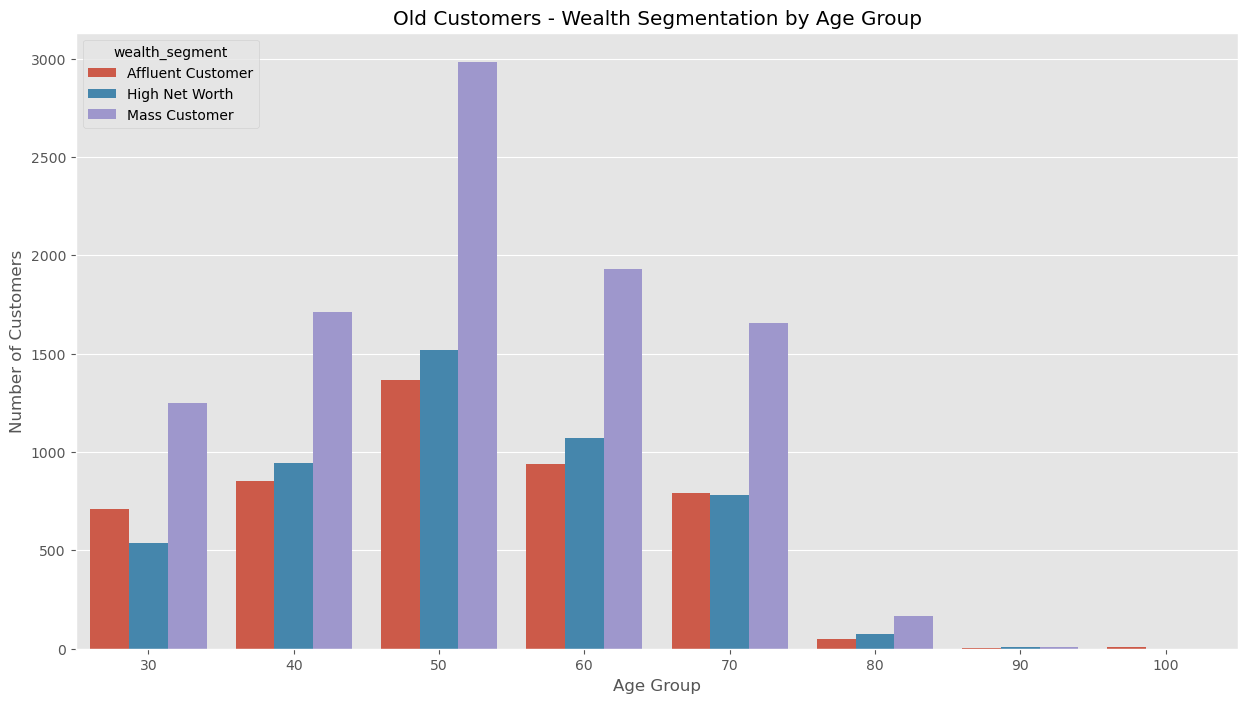

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age_Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Wealth Segmentation by Age Group')
plt.show()

## 3.5 Car owner access each State

The customer base of the automobile bike company lies in New South Wales, Queensland and Victoria, Australia.
In New South Wales (NSW) it seems there is a greater amount of people who donot own a car. In Victoria (VIC) the proportion is evenly split. However in Queensland (QLD) there are relatively more people who own the car.

In [47]:
# Loading the Customer Address Dataset

cust_addr_info = pd.read_csv('CustomerAddress_Cleaned.csv')

In [48]:
# Merging RFM data with Customer Address Dataset

cust_trans_addr = pd.merge(cust_trans_rfm, cust_addr_info, left_on='customer_id', right_on = 'customer_id', how='inner')

In [49]:
print("RFM table Records count : {}\nAddress Table Records count :{}".format(cust_trans_rfm.shape[0] ,cust_addr_info.shape[0]))

RFM table Records count : 19354
Address Table Records count :3999


In [53]:
state_car_owners = cust_trans_addr[['state' , 'owns_car' , 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()


In [54]:
state_car_owners.rename(columns={0:'Number of Customers'}, inplace=True)
state_car_owners

,state,owns_car,Number of Customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


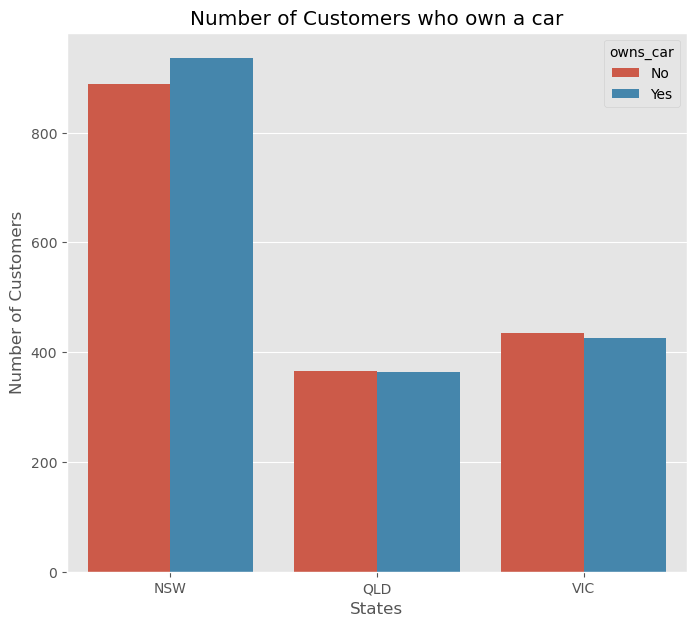

In [55]:
plt.figure(figsize=(8,7))
sns.barplot(x='state', y='Number of Customers' , hue='owns_car', data=state_car_owners)
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who own a car')
plt.show()

## 4.1 Recency vs Monetary

The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

<Figure size 800x700 with 0 Axes>

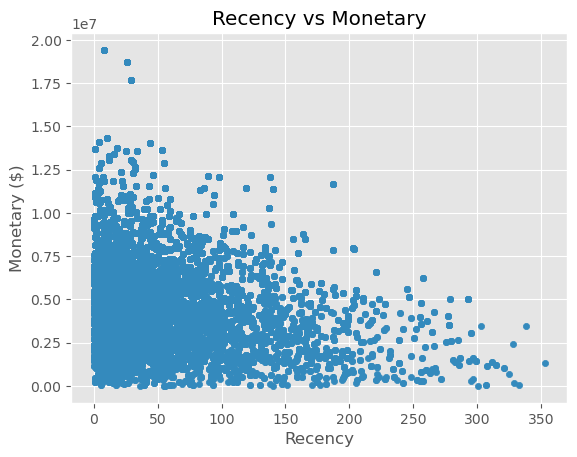

In [56]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='recency', y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

## 4.2 Frequency vs Monetary

Customers classified as "Platinum Customers" , "Very Loyal" and "Becoming Loyal" visit frequently which correlated with increased revenue for the business.

<Figure size 800x700 with 0 Axes>

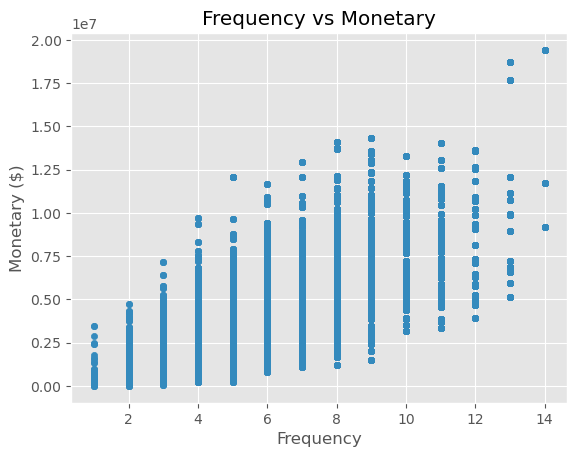

In [57]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='frequency', y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

# 5. Customer Segment Distribution

FInally we can plot the Number of Customers present under a Customer Segment.

In [58]:
# Calculating the number of unique customers under a customer title.

cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id', 'rank']].drop_duplicates().groupby(['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [59]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,163
10,Very Loyal,2,185
1,Becoming Loyal,3,341
9,Recent Customer,4,357
8,Potential Customer,5,322
3,High Risk Customer,8,376
0,Almost Lost Customer,9,317
2,Evasive Customer,10,410
4,Late BLoomer,11,350
5,Lossing Customer,11,334


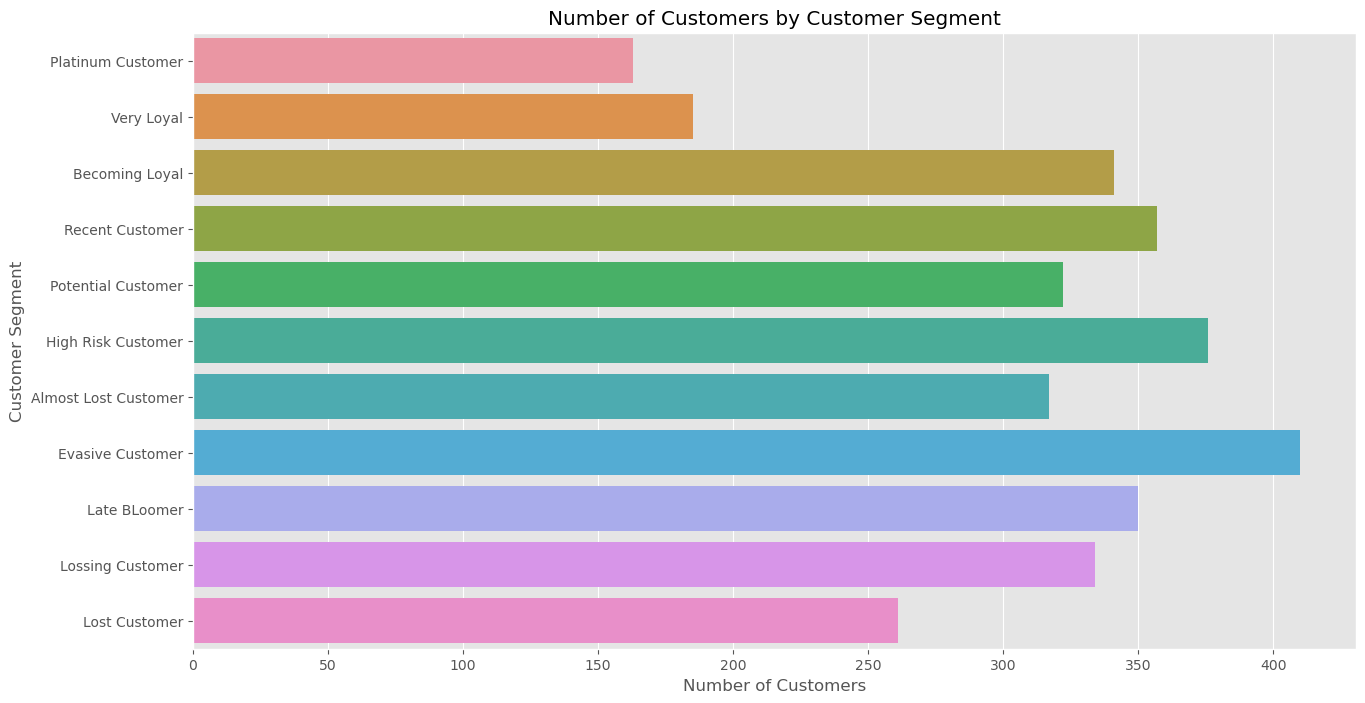

In [60]:
# Plotting the number of customers

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()